# Preparation
What we need to do now is split our data into train and test datasets. The train data consists of the rows on which we want to train our machine learning algorithm and the test data consists of the rows which we want to predict the Species for. Therefore we have to install the package caTools with install.packages("caTools"). I have it already installed, so I only have to load it with library(caTools). With the function sample.split() we label every element of the Species column with TRUE or FALSE, where TRUE indicates training data and FALSE indicates test data. The SplitRatio can be variied but 0.7 is common. The function set.seed() is used so that the results can be reproduced. We produce two different datasets for the test and train data, data_test, data_test_labeled, data_train and data_train_labeled to compare our prediction later on with the true labels.

In [66]:
data = iris
library(caTools)
set.seed(15)

s = sample.split(data[,5],SplitRatio = 0.7)
data_train_labeled = data[s,]
data_train = data_train_labeled[,-5]
data_test_labeled = data[!s,]
data_test = data_test[,-5]

head(data_train_labeled)
head(data_train)
#head(data_test_labeled)
#head(data_test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


Now we have the desired form of our data to use the KNN algorithm. The KNN algorithm is a ML algorithm for supervised learning. Basically if you wish to predict a data point x, you compute the distance between x and the k nearest neighbours. Then you label x with the most common label in the k neighbours (it can also be used for regression). More informations can be found here https://www.analyticsvidhya.com/blog/2014/10/introduction-k-neighbours-algorithm-clustering/.

# Prediction (KNN)
First of all we have to install and load the package "class" in R.

In [68]:
library(class)

knn_one = knn(data_train,data_test,data_train_labeled[,5],k=1)

accuracy = sum(data_test_labeled[,5] == knn_one)/length(data_test_labeled[,5])
print(accuracy)

[1] 0.9555556


It can be seen that if we choose k=1 then we get a prediction accuracy of 0.9555556. That's pretty good for such an easy algorithm but on this dataset a better accuracy should be possible. Therefore we vary k and plot different k's  against their accuracy!

[1] 0.9555556 0.9555556 0.9777778 0.9777778 0.9777778 0.9777778 0.9777778
 [8] 0.9333333 0.9555556 0.9555556 0.9555556 0.9555556 0.9333333 0.9333333
[15] 0.9333333 0.9111111 0.9111111 0.9111111 0.9111111 0.9333333

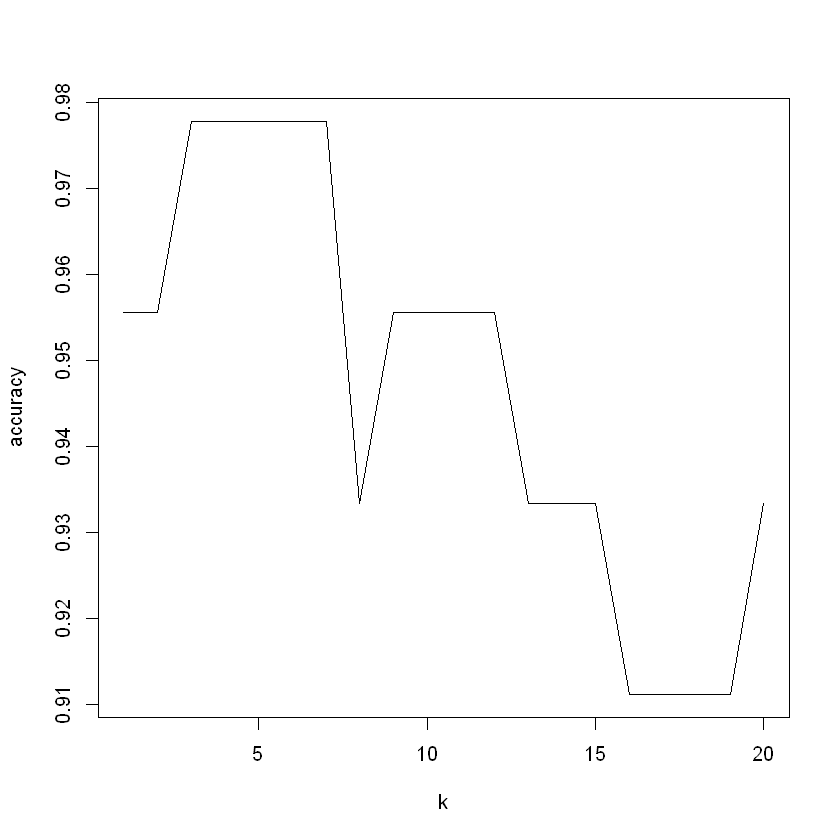

In [70]:
accuracy = NULL
for (i in c(1:20)){
    accuracy.i = knn(data_train,data_test,data_train_labeled[,5],k=i)
    accuracy = c(accuracy,sum(data_test_labeled[,5] == accuracy.i)/length(data_test_labeled[,5]))
}
plot(c(1:20),accuracy,type='l',xlab='k',ylab='accuracy')
accuracy

We achieve the best accuracy for k=3,4,5,6,7. k=3 would be an appropriate choice. It has to be mentioned that in reality the test data has no labels. Therefore another approach like Cross Validation has to be used. We will get there in the next projects!